In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats


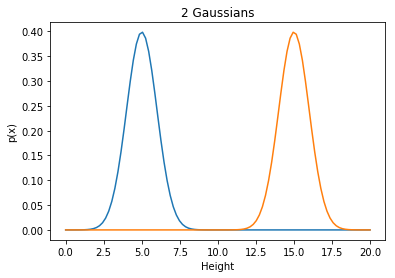

In [3]:

x = np.linspace(0, 20, 100)
plt.title('2 Gaussians')
plt.xlabel('Height')
plt.ylabel('p(x)')
plt.plot(x, stats.norm.pdf(x, 5, 1))
plt.plot(x, stats.norm.pdf(x, 15, 1))
plt.show()

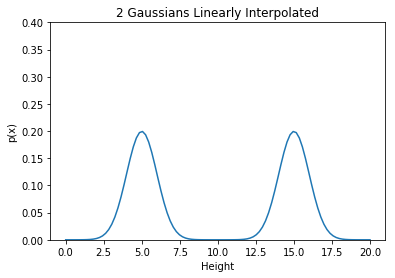

In [13]:
# Option 1 Interpolate distributions

def h(t):
    return (1-t)*stats.norm.pdf(x, 5, 1) + t*stats.norm.pdf(x, 15, 1)

t = 0.5
x = np.linspace(0, 20, 100)
plt.title('2 Gaussians Linearly Interpolated')
plt.xlabel('Height')
plt.ylabel('p(x)')
plt.plot(x, h(t))
plt.ylim(0, 0.4)
plt.show()

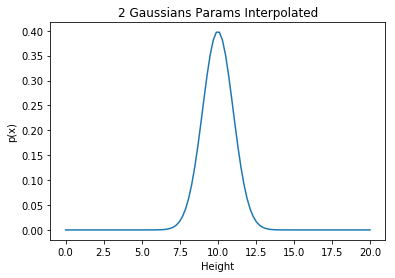

In [135]:
# Option 2 Interpolate params
x = np.linspace(0, 20, 100)
plt.title('2 Gaussians Params Interpolated')
plt.xlabel('Height')
plt.ylabel('p(x)')
plt.plot(x, (stats.norm.pdf(x, (5 + 15) / 2,  math.sqrt((1*1 + 1*1)/2))))
plt.show()


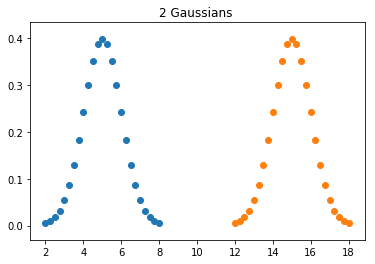

In [136]:
x1 = np.linspace(2, 8, 25)
x2 = np.linspace(12, 18, 25)
y1 = stats.norm.pdf(x1, 5, 1)
y2 = stats.norm.pdf(x2, 15, 1)

plt.title('2 Gaussians ')
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

w:  [0.00061758 0.         0.00161772 0.00434791 0.00266849 0.01912243
 0.00919703 0.04806537 0.02738617 0.08654999 0.05160847 0.11605739
 0.06337365 0.11605739 0.05160847 0.08654999 0.02738617 0.04806537
 0.00919703 0.01912243 0.00266849 0.00434791 0.00161772 0.
 0.00061758]
loss:  1.6363662402341915e-08
w:  [0.00061758 0.         0.00161772 0.00434791 0.00266849 0.01912243
 0.00919703 0.04806537 0.02738617 0.08654999 0.05160847 0.11605739
 0.06337365 0.11605739 0.05160847 0.08654999 0.02738617 0.04806537
 0.00919703 0.01912243 0.00266849 0.00434791 0.00161772 0.
 0.00061758]
loss:  1.6363662402341915e-08


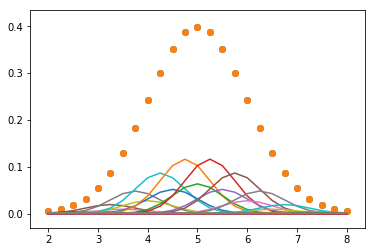

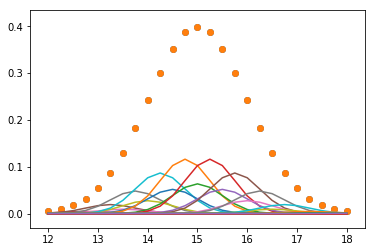

In [137]:

# distance
def d(x, xi):
    return x - xi

# G
def G_K(sigma, x):
    return np.exp(-pow(np.linalg.norm(x), 2)/(2*sigma*sigma))


SIGMA = 0.5

# create G-matrix
def create_G(x):
    N = len(x)
    G = np.zeros((N,N))
    sigmas = [SIGMA]*N
    for i in range(N):
        for j in range(N):
            G[i,j] = G_K(sigmas[i], d(x[i], x[j]))
        #G[i, :] /= G[i, :].sum()
    return G

# Solve the lsq 
from scipy import optimize
def get_weight(x, y):
    G = create_G(x)
    (w, _) = optimize.nnls(G, y)
    curr_loss = y - np.dot(G,w)
    print("w: ", w)
    print('loss: ', np.linalg.norm(curr_loss))
    
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, G*w)
    plt.scatter(x, np.dot(G, w))
    return w, G

w1, G1 = get_weight(x1, y1)
s1 = w1.sum()
w1 /= s1
w2, G2 = get_weight(x2, y2)
s2 = w2.sum()
w2 /= s2
# now the normalized weights are 

w:  [0.65937681 0.         0.48357229 0.79805908 0.         1.10981852
 0.1584174  0.53614896 0.64375404 0.         0.43636698 0.13669336
 0.         0.         0.         0.         0.         0.
 0.03859427 0.49382646 0.         0.45007182 0.76363456 0.
 1.04164677 0.2500063  0.60417499 0.40008655 0.53072548 0.
 0.44851457 0.         0.         0.         0.         0.
 0.         0.         0.         0.93733905]
loss:  0.11471239268197225
f


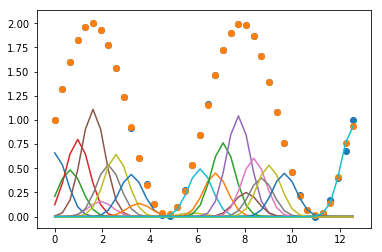

In [138]:
x_sin = np.linspace(0, 4*math.pi, 40)
y_sin = np.sin(x_sin) + 1
get_weight(x_sin, y_sin)
print('f')

In [139]:
# Since solvers are faster when 

In [140]:
from __future__ import print_function
from ortools.graph import pywrapgraph


C = 1e5

G = nx.DiGraph()
G.add_node('s', demand = -1*C)
G.add_node('t', demand =  1*C)

for i in range(len(w1)):
    c = w1[i]*C
    print('capacity: {}'.format(c))
    G.add_edge('s', 'f{}'.format(i), capacity=c)
for j in range(len(w2)):
    c = w2[i]*C
    print('capacity: {}'.format(c))
    G.add_edge('g{}'.format(j), 't', capacity=c)

# we use euclidian distance between distributions. Geodesic distance would be better? 
n1 = len(x1)
n2 = len(x2)
for i in range(n1):
    yi = y1[i]
    for j in range(n2):
        yj = y2[j]
        d = yi - yj
        w = np.dot(d.T, d)*C
        print('Weight: {}'.format(w))
        G.add_edge('f{}'.format(i), 'g{}'.format(j), weight=w)
        
flowCost, flowDict = nx.network_simplex(G)


ModuleNotFoundError: No module named 'ortools'

In [ ]:
from pyemd import emd_with_flow

n = len(x1)

d1 = np.zeros((n,n))
for i in range(n):
    xi = x1[i]
    for j in range(n):
        d1[i,j] = np.power(xi - x2[j], 2)


val, t_matrix = emd_with_flow(w1.astype(np.float64), w2.astype(np.float64), d1)    
print(val)

t_matrix = np.array(t_matrix)


In [ ]:
# Interpolation

# 1) for each matching create a particle on source and target side
#  those particles have then obviously the same weight
# 2) then for each matching we create a new gaussian with the weight of the matching
# 3) z_l is then the geodistic interpolation between source and target 
# and we can calculate the new position with this 

N, M = t_matrix.shape            
particle_config = []
for i in range(N):
    for j in range(M):
        if t_matrix[i,j] != 0:
            particle_config.append((i,j,t_matrix[i,j]))
particle_config

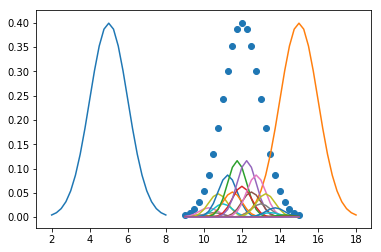

In [141]:
SIGMA = 0.5

w_l = [w for (i,j,w) in particle_config]

# create G-matrix
def create_G(x, t):
    N = len(x)
    G = np.zeros((N,len(w_l)))
    sigmas = [SIGMA]*N
    for l,(u,v,w) in enumerate(particle_config):
        for i in range(N):
            z_l = (1-t)*x[u] + t*x[v]
            G[i,l] = G_K(sigmas[l], d(z_l, x[i]))
        #G[i, :] /= G[i, :].sum()
    return G

def h(t):
    z = (1-t)*x1 + t*x2
    sf = (1-t)*s1 + t*s2
    G = create_G(z, t)
    
    #plt.figure()
    #plt.plot(x1, y1)
    #plt.plot(x2, y2)
    #plt.plot(z, sf*G*w_l)
    #plt.scatter(z, np.dot(sf*G, w_l))
    #plt.show()
    return z, sf*G*w_l, np.dot(sf*G, w_l)
    
z, gaussians, interpol  = h(0.7)

plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(z, gaussians)
plt.scatter(z, interpol)
plt.show()


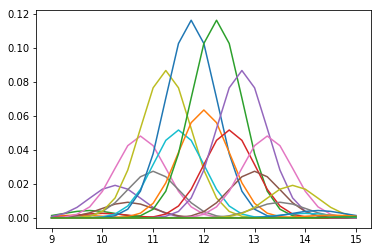

In [149]:
plt.figure()
for i in range(gaussians.T.shape[0]):
    plt.plot(z, gaussians.T[i])
plt.show()

(array([ 9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
        11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
        13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  ]),
 array([[9.00000000e+00, 4.43215060e-03],
        [9.25000000e+00, 9.09409177e-03],
        [9.50000000e+00, 1.75290017e-02],
        [9.75000000e+00, 3.17403618e-02],
        [1.00000000e+01, 5.39915048e-02],
        [1.02500000e+01, 8.62776449e-02],
        [1.05000000e+01, 1.29517784e-01],
        [1.07500000e+01, 1.82649252e-01],
        [1.10000000e+01, 2.41970877e-01],
        [1.12500000e+01, 3.01137555e-01],
        [1.15000000e+01, 3.52065386e-01],
        [1.17500000e+01, 3.86668148e-01],
        [1.20000000e+01, 3.98942292e-01],
        [1.22500000e+01, 3.86668148e-01],
        [1.25000000e+01, 3.52065386e-01],
        [1.27500000e+01, 3.01137555e-01],
        [1.30000000e+01, 2.41970877e-01],
        [1.32500000e+01, 1.82649252e-01],
        [1.35000000e+01, 1.29517784e-01],
 

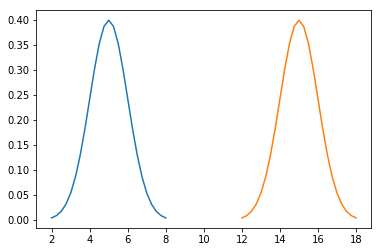

In [172]:
## Animation for interpolating 2 gaussians
from matplotlib import animation, rc
from IPython.display import HTML, Image

rc('animation', html='html5')

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.plot(x1, y1)
ax.plot(x2, y2)

gs = 23

lines = [(ax.plot([], [], lw=2)[0]) for i in range(gs)]
lines.append(ax.scatter([],[]))


# initialization function: plot the background of each frame
def init():
    [line.set_data([], []) for line in lines[:-2]]
    
    return lines

# animation function. This is called sequentially
def animate(i):
    t = i/100
    
    z, gaussians, interpol  = h(t)
    
    for i in range(gs):
        lines[i].set_data(z, gaussians.T[i])
    
    off = np.array((z, interpol)).T
    lines[-1].set_offsets(off)
    
    return lines

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [173]:
anim.save('animation_ip2.gif', writer='imagemagick', fps=60)


Init 1/3 with method: k-means++


/home/simi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Inertia for init 1/3: 0.704498
Init 2/3 with method: k-means++


/home/simi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Inertia for init 2/3: 1.185772
Init 3/3 with method: k-means++


/home/simi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Inertia for init 3/3: 1.426602
Minibatch iteration 1/669000: mean batch inertia: 0.293767, ewa inertia: 0.293767 
Minibatch iteration 2/669000: mean batch inertia: 0.589899, ewa inertia: 0.293856 
Minibatch iteration 3/669000: mean batch inertia: 0.256234, ewa inertia: 0.293845 
Minibatch iteration 4/669000: mean batch inertia: 0.167878, ewa inertia: 0.293807 
Minibatch iteration 5/669000: mean batch inertia: 0.228633, ewa inertia: 0.293788 
Minibatch iteration 6/669000: mean batch inertia: 0.164325, ewa inertia: 0.293749 
Minibatch iteration 7/669000: mean batch inertia: 0.191153, ewa inertia: 0.293718 
Minibatch iteration 8/669000: mean batch inertia: 0.237472, ewa inertia: 0.293701 
Minibatch iteration 9/669000: mean batch inertia: 0.258706, ewa inertia: 0.293691 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 10/669000: mean batch inertia: 0.196436, ewa inertia: 0.293662 
Minibatch iteration 11/669000: mean batch inertia: 0.251927, ewa inertia: 0.293649 
Mini

Minibatch iteration 93/669000: mean batch inertia: 0.286323, ewa inertia: 0.291966 
Minibatch iteration 94/669000: mean batch inertia: 0.276109, ewa inertia: 0.291962 
Minibatch iteration 95/669000: mean batch inertia: 0.300458, ewa inertia: 0.291964 
Minibatch iteration 96/669000: mean batch inertia: 0.206002, ewa inertia: 0.291939 
Minibatch iteration 97/669000: mean batch inertia: 0.179498, ewa inertia: 0.291905 
Minibatch iteration 98/669000: mean batch inertia: 0.130108, ewa inertia: 0.291857 
Minibatch iteration 99/669000: mean batch inertia: 0.237348, ewa inertia: 0.291840 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 100/669000: mean batch inertia: 0.234243, ewa inertia: 0.291823 
Minibatch iteration 101/669000: mean batch inertia: 0.202675, ewa inertia: 0.291796 
Minibatch iteration 102/669000: mean batch inertia: 0.244441, ewa inertia: 0.291782 
Minibatch iteration 103/669000: mean batch inertia: 0.328429, ewa inertia: 0.291793 
Minibatch iteration 10

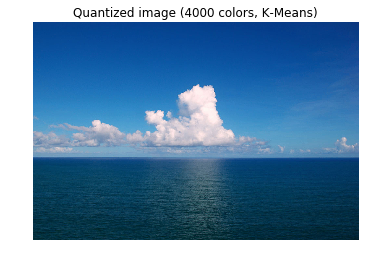

Init 1/3 with method: k-means++


/home/simi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Inertia for init 1/3: 10.047744
Init 2/3 with method: k-means++


/home/simi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Inertia for init 2/3: 11.270468
Init 3/3 with method: k-means++


/home/simi/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:1559: RuntimeWarning: init_size=300 should be larger than k=4000. Setting it to 3*k
  init_size=init_size)


Inertia for init 3/3: 9.887581
Minibatch iteration 1/750000: mean batch inertia: 1.174098, ewa inertia: 1.174098 
Minibatch iteration 2/750000: mean batch inertia: 1.047768, ewa inertia: 1.174065 
Minibatch iteration 3/750000: mean batch inertia: 1.132530, ewa inertia: 1.174054 
Minibatch iteration 4/750000: mean batch inertia: 1.334162, ewa inertia: 1.174096 
Minibatch iteration 5/750000: mean batch inertia: 1.243821, ewa inertia: 1.174115 
Minibatch iteration 6/750000: mean batch inertia: 1.155640, ewa inertia: 1.174110 
Minibatch iteration 7/750000: mean batch inertia: 1.409201, ewa inertia: 1.174173 
Minibatch iteration 8/750000: mean batch inertia: 1.097770, ewa inertia: 1.174152 
Minibatch iteration 9/750000: mean batch inertia: 1.259398, ewa inertia: 1.174175 
[MiniBatchKMeans] Reassigning 50 cluster centers.
Minibatch iteration 10/750000: mean batch inertia: 1.230220, ewa inertia: 1.174190 
Minibatch iteration 11/750000: mean batch inertia: 1.130351, ewa inertia: 1.174178 
Mini

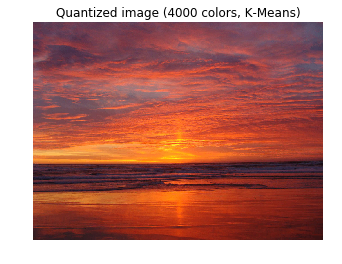

In [16]:
import imageio
import skimage
im1 = imageio.imread('ocean_day.jpg')
im2 = imageio.imread('ocean_sunset.jpg')

# 1) Calculate color appearance 
im1_lab = skimage.color.rgb2lab(im1)
im2_lab = skimage.color.rgb2lab(im2)

# 2) Reducing bit size
# lets ignore this for now

# 3) Indexing colours and calculate histograms
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

N = 4000

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    
    return image

def cluster(im):
    n_colors = N
    N_SAMPLES = -1
    w, h, d = im.shape
    image_array = np.reshape(im, (w * h, d))
    #image_array_sample = shuffle(image_array, random_state=0)
    kmeans = MiniBatchKMeans(n_clusters=n_colors, random_state=0, verbose=True).fit(image_array)
    # Get labels for all points
    labels = kmeans.predict(image_array)

    re_img = recreate_image(kmeans.cluster_centers_, labels, w, h)
    
    plt.figure(2)
    plt.clf()
    plt.axis('off')
    plt.title('Quantized image ({} colors, K-Means)'.format(N))
    plt.imshow(skimage.color.lab2rgb(re_img))
    plt.show()
    return labels, labels.reshape(w, h), kmeans.cluster_centers_

lbl1, lbl_img_1, cookbook1 = cluster(im1_lab)
lbl2, lbl_img_2, cookbook2 = cluster(im2_lab)

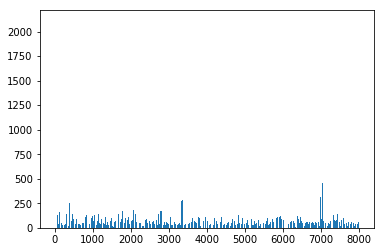

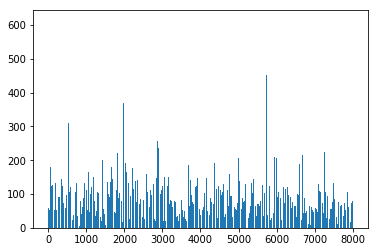

In [ ]:
h1 = np.bincount(lbl1, minlength=N)
h2 = np.bincount(lbl2, minlength=N)

plt.bar(np.arange(N), h1)
plt.show()
plt.bar(np.arange(N), h2)
plt.show()

In [ ]:
# Step 4 Calculating transformation between histograms
from pyemd import emd_with_flow

# a) Calculate the difference between the colors to define dij
distance_matrix = np.zeros((N,N), dtype=np.float64)

#for i in range(N):
#    for j in range(N):
#        d = cookbook1[i, :] - cookbook2[j,:]
#        distance_matrix[i,j] = np.dot(d.T, d)
        
distance_matrix = cookbook1 - cookbook2
distance_matrix = np.dot(distance_matrix, distance_matrix.T)
# b) Calculate earth mover distance
h_1 = h1 / h1.sum()
h_2 = h2 / h2.sum()
val, min_cost = emd_with_flow(h_1.astype(np.float64), h_2.astype(np.float64), distance_matrix)    
print(val)

min_cost = np.array(min_cost)


In [ ]:
# sample from the earth movers distance a color so that we can transform back to an image
print(sum(min_cost[0]), h1[0])
w, h = lbl_img_1.shape

transformed_img = np.zeros((w,h,3))

for i in range(w):
    for j in range(h):
        source_index = lbl_img_1[i][j]
        sample_target_index = np.argmax(np.random.multinomial(1, min_cost[source_index]
                                                              /sum(min_cost[source_index]), size=1))
        transformed_img[i][j] = cookbook2[sample_target_index,:]
        


In [ ]:

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Original Image')
plt.imshow(skimage.color.lab2rgb(im2_lab))
plt.show()

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Transformed Image')
plt.imshow(skimage.color.lab2rgb(transformed_img))
plt.show()